In [5]:
import pandas as pd
import ast

comp_df = pd.read_csv('comp.csv')
eval_df = pd.read_csv('eval.csv')
comp_df.rename(columns={'Unnamed: 0': 'post_id'}, inplace=True)
comp_df.rename(columns={'Unnamed: 1': 'comp_id_of_post'}, inplace=True)

eval_df.rename(columns={'Unnamed: 0': 'post_id'}, inplace=True)
eval_df.rename(columns={'Unnamed: 1': 'eval_id_of_post'}, inplace=True)
eval_df['summary_eval'] = eval_df['summary_eval'].apply(ast.literal_eval)

In [6]:
# Extract the 'summary_eval' column as a DataFrame
summary_eval_df = pd.DataFrame(eval_df['summary_eval'].tolist())

# Drop the 'compatible' column if present
summary_eval_df = summary_eval_df.drop('compatible', axis=1)

# Concatenate the original DataFrame without 'summary_eval' column and the extracted columns
eval_table = pd.concat([eval_df.drop('summary_eval', axis=1), summary_eval_df], axis=1)

In [7]:
# Extract the relevant columns
cols = ['overall', 'accuracy', 'coverage', 'coherence']

# Compare each column against the others
comparison = {}
for col1 in cols:
    comparison[col1] = {}
    for col2 in cols:
        if col1 != col2:
            comparison[col1][col2] = (eval_table[col1] > eval_table[col2]).sum()

comparison_df = pd.DataFrame(comparison)
print(comparison_df)

           overall  accuracy  coverage  coherence
accuracy     122.0       NaN     208.0      476.0
coverage     221.0     825.0       NaN      966.0
coherence     41.0     222.0      93.0        NaN
overall        NaN     900.0     318.0     1044.0


In [8]:
correlation_with_coverage = eval_table.corrwith(eval_table['coverage'])

print(correlation_with_coverage)

eval_id_of_post    0.008714
summary_id         0.016444
overall            0.886665
accuracy           0.337577
coverage           1.000000
coherence          0.329766
dtype: float64


<ipython-input-8-026253e56f5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_coverage = eval_table.corrwith(eval_table['coverage'])


In [9]:
correlation_with_coherence = eval_table.corrwith(eval_table['coherence'])

print(correlation_with_coherence)

eval_id_of_post   -0.004083
summary_id         0.215232
overall            0.376374
accuracy           0.227978
coverage           0.329766
coherence          1.000000
dtype: float64


<ipython-input-9-1782203da5be>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_coherence = eval_table.corrwith(eval_table['coherence'])


In [10]:
correlation_with_accuracy = eval_table.corrwith(eval_table['accuracy'])

print(correlation_with_accuracy)

eval_id_of_post    0.036146
summary_id         0.088497
overall            0.498227
accuracy           1.000000
coverage           0.337577
coherence          0.227978
dtype: float64


<ipython-input-10-5a783c4acfa1>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_accuracy = eval_table.corrwith(eval_table['accuracy'])


In [15]:
# Dropping the first 2 columns of eval_table
eval_table_dropped = eval_table.drop(eval_table.columns[[0, 1, 2]], axis=1)

eval_table_dropped.head()


,summary_text,worker_id,overall,accuracy,coverage,coherence
0,My boyfriend has been mean to me months after...,dL2Aff39094mOhTKsLkJg8sCCFbirW,4.0,4.0,4.0,7.0
1,New roommate washed my laundry without asking...,dL2Aff39094mOhTKsLkJg8sCCFbirW,7.0,7.0,7.0,7.0
2,"gf has anxiety, and her cousin/bestfriend fuc...",RMwrIV50cNusBthNvLs1wSNdqFpQAg,4.0,6.0,4.0,4.0
3,I didn't give up my stupid career for my fami...,OKFDIsAZl6Qa0m9x26f5Ao4S0uc7Ca,1.0,1.0,1.0,6.0
4,Boyfriend's chinese mother dosn't like me bec...,RMwrIV50cNusBthNvLs1wSNdqFpQAg,4.0,4.0,4.0,7.0


<ipython-input-16-7d372313e9ae>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = eval_table_dropped.corr()


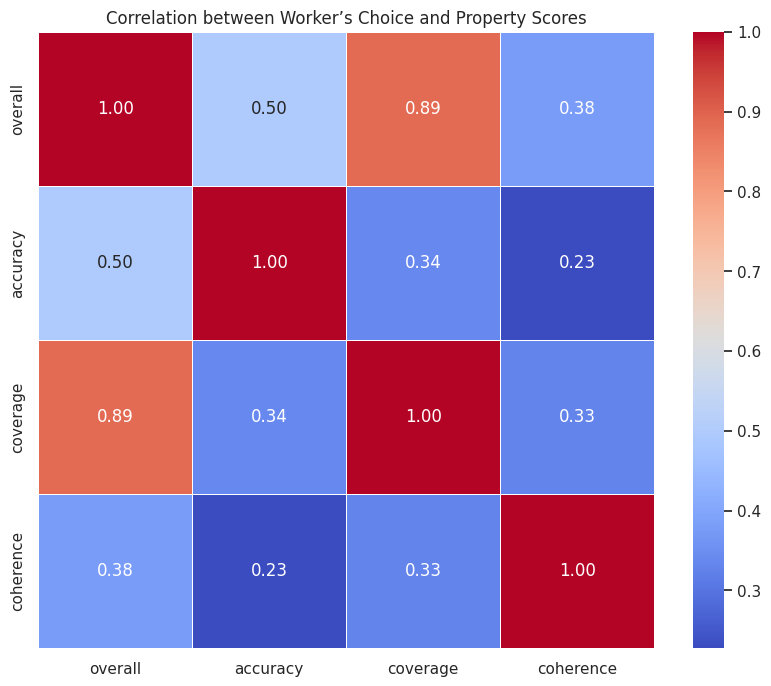

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Prepare data for correlation heatmap
correlation_matrix = eval_table_dropped.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation between Worker’s Choice and Property Scores')
plt.show()
